In [1]:
import torch
import os

print(os.getcwd())
device = 'cuda' if torch.cuda.is_available() else 'cpu'

/home/sumit/eva7/assignment12/assignment9


In [2]:
!git clone https://github.com/sumitsarkar1/sumitEVA7.git

fatal: destination path 'sumitEVA7' already exists and is not an empty directory.


In [3]:
import main

net = main.getModel()
net = net.to(device)

In [4]:
SEED = 1

use_cuda = torch.cuda.is_available()
print("CUDA Available?", use_cuda)

torch.manual_seed(SEED)

if use_cuda:
    torch.cuda.manual_seed(SEED)

CUDA Available? True


In [5]:
!pip install torchsummary

from torchsummary import summary
device = torch.device("cuda" if use_cuda else "cpu")

In [6]:
net = net.to(device)
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]           1,184
         MaxPool2d-2            [-1, 8, 13, 13]               0
              ReLU-3            [-1, 8, 13, 13]               0
            Conv2d-4             [-1, 10, 9, 9]           2,010
         MaxPool2d-5             [-1, 10, 4, 4]               0
              ReLU-6             [-1, 10, 4, 4]               0
            Linear-7                   [-1, 32]           5,152
              ReLU-8                   [-1, 32]               0
            Linear-9                    [-1, 6]             198
           Conv2d-10           [-1, 10, 28, 28]             760
           Conv2d-11           [-1, 20, 10, 10]           5,020
        Dropout2d-12           [-1, 20, 10, 10]               0
           Linear-13                   [-1, 50]          25,050
           Linear-14                   

/home/sumit/anaconda3/envs/resnet/lib/python3.8/site-packages/torch/nn/functional.py:4065: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/home/sumit/anaconda3/envs/resnet/lib/python3.8/site-packages/torch/nn/functional.py:4003: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


In [7]:
import torch.optim as optim

from main import args
myargs = args()
myargs.batch_size = 256
epochs = 50
lr = 0.007

trainloader = main.getTrainLoader(myargs)
testloader = main.getTestLoader(myargs)

max_lr = 0.007
pct_start = 0.3 #5/24
div_factor = 25
steps_per_epoch = len(trainloader)
final_div_factor = 1e4 # NO ANNIHILATION

optimizer = main.setOptimizer(net, lr)
scheduler = main.setScheduler(optimizer, epochs, max_lr, steps_per_epoch, pct_start, div_factor, final_div_factor)

torch.cuda.empty_cache()

for epoch in range(epochs):
    print("EPOCH:", epoch+1)
    main.train(net, scheduler, optimizer, trainloader, device)
    main.test(net, testloader, device)

Files already downloaded and verified
Files already downloaded and verified
EPOCH: 1


Loss=2.3003010749816895 Batch_id=195 Train Accuracy=11.60: 100%|█| 196/196 



Test set: Average loss: 0.0091, Accuracy: 1721/10000 (17.21%)

EPOCH: 2


Loss=2.258594512939453 Batch_id=195 Train Accuracy=14.81: 100%|█| 196/196 [



Test set: Average loss: 0.0088, Accuracy: 2415/10000 (24.15%)

EPOCH: 3


Loss=2.220384359359741 Batch_id=195 Train Accuracy=18.43: 100%|█| 196/196 [



Test set: Average loss: 0.0083, Accuracy: 2687/10000 (26.87%)

EPOCH: 4


Loss=2.0437111854553223 Batch_id=195 Train Accuracy=20.83: 100%|█| 196/196 



Test set: Average loss: 0.0080, Accuracy: 2908/10000 (29.08%)

EPOCH: 5


Loss=2.0039470195770264 Batch_id=195 Train Accuracy=23.29: 100%|█| 196/196 



Test set: Average loss: 0.0077, Accuracy: 3357/10000 (33.57%)

EPOCH: 6


Loss=1.9755380153656006 Batch_id=195 Train Accuracy=25.90: 100%|█| 196/196 



Test set: Average loss: 0.0073, Accuracy: 3611/10000 (36.11%)

EPOCH: 7


Loss=2.0358924865722656 Batch_id=195 Train Accuracy=27.86: 100%|█| 196/196 



Test set: Average loss: 0.0071, Accuracy: 3917/10000 (39.17%)

EPOCH: 8


Loss=2.016281843185425 Batch_id=195 Train Accuracy=29.66: 100%|█| 196/196 [



Test set: Average loss: 0.0067, Accuracy: 4039/10000 (40.39%)

EPOCH: 9


Loss=1.9688632488250732 Batch_id=195 Train Accuracy=31.32: 100%|█| 196/196 



Test set: Average loss: 0.0065, Accuracy: 4166/10000 (41.66%)

EPOCH: 10


Loss=1.8237565755844116 Batch_id=195 Train Accuracy=33.04: 100%|█| 196/196 



Test set: Average loss: 0.0064, Accuracy: 4381/10000 (43.81%)

EPOCH: 11


Loss=1.6464192867279053 Batch_id=195 Train Accuracy=34.35: 100%|█| 196/196 



Test set: Average loss: 0.0063, Accuracy: 4425/10000 (44.25%)

EPOCH: 12


Loss=1.672033667564392 Batch_id=195 Train Accuracy=34.82: 100%|█| 196/196 [



Test set: Average loss: 0.0061, Accuracy: 4567/10000 (45.67%)

EPOCH: 13


Loss=1.6979211568832397 Batch_id=195 Train Accuracy=36.01: 100%|█| 196/196 



Test set: Average loss: 0.0060, Accuracy: 4606/10000 (46.06%)

EPOCH: 14


Loss=1.6795307397842407 Batch_id=195 Train Accuracy=36.67: 100%|█| 196/196 



Test set: Average loss: 0.0060, Accuracy: 4655/10000 (46.55%)

EPOCH: 15


Loss=1.580049991607666 Batch_id=195 Train Accuracy=37.54: 100%|█| 196/196 [



Test set: Average loss: 0.0060, Accuracy: 4644/10000 (46.44%)

EPOCH: 16


Loss=1.657857894897461 Batch_id=195 Train Accuracy=37.73: 100%|█| 196/196 [



Test set: Average loss: 0.0058, Accuracy: 4755/10000 (47.55%)

EPOCH: 17


Loss=1.628798246383667 Batch_id=195 Train Accuracy=38.61: 100%|█| 196/196 [



Test set: Average loss: 0.0058, Accuracy: 4867/10000 (48.67%)

EPOCH: 18


Loss=1.8754417896270752 Batch_id=195 Train Accuracy=38.42: 100%|█| 196/196 



Test set: Average loss: 0.0058, Accuracy: 4845/10000 (48.45%)

EPOCH: 19


Loss=1.6457545757293701 Batch_id=195 Train Accuracy=39.32: 100%|█| 196/196 



Test set: Average loss: 0.0058, Accuracy: 4820/10000 (48.20%)

EPOCH: 20


Loss=1.7133893966674805 Batch_id=195 Train Accuracy=39.70: 100%|█| 196/196 



Test set: Average loss: 0.0057, Accuracy: 5022/10000 (50.22%)

EPOCH: 21


Loss=1.6492204666137695 Batch_id=195 Train Accuracy=40.04: 100%|█| 196/196 



Test set: Average loss: 0.0057, Accuracy: 4917/10000 (49.17%)

EPOCH: 22


Loss=1.5904595851898193 Batch_id=195 Train Accuracy=40.27: 100%|█| 196/196 



Test set: Average loss: 0.0056, Accuracy: 5000/10000 (50.00%)

EPOCH: 23


Loss=1.8792167901992798 Batch_id=195 Train Accuracy=40.60: 100%|█| 196/196 



Test set: Average loss: 0.0055, Accuracy: 5218/10000 (52.18%)

EPOCH: 24


Loss=1.575289011001587 Batch_id=195 Train Accuracy=40.85: 100%|█| 196/196 [



Test set: Average loss: 0.0054, Accuracy: 5145/10000 (51.45%)

EPOCH: 25


Loss=1.6479835510253906 Batch_id=195 Train Accuracy=41.07: 100%|█| 196/196 



Test set: Average loss: 0.0054, Accuracy: 5281/10000 (52.81%)

EPOCH: 26


Loss=1.3730666637420654 Batch_id=195 Train Accuracy=41.75: 100%|█| 196/196 



Test set: Average loss: 0.0054, Accuracy: 5235/10000 (52.35%)

EPOCH: 27


Loss=1.6312297582626343 Batch_id=195 Train Accuracy=41.84: 100%|█| 196/196 



Test set: Average loss: 0.0054, Accuracy: 5256/10000 (52.56%)

EPOCH: 28


Loss=1.41292142868042 Batch_id=195 Train Accuracy=41.96: 100%|█| 196/196 [0



Test set: Average loss: 0.0053, Accuracy: 5275/10000 (52.75%)

EPOCH: 29


Loss=1.715773344039917 Batch_id=195 Train Accuracy=42.36: 100%|█| 196/196 [



Test set: Average loss: 0.0053, Accuracy: 5296/10000 (52.96%)

EPOCH: 30


Loss=1.49656081199646 Batch_id=195 Train Accuracy=42.62: 100%|█| 196/196 [0



Test set: Average loss: 0.0053, Accuracy: 5206/10000 (52.06%)

EPOCH: 31


Loss=1.7887399196624756 Batch_id=195 Train Accuracy=42.75: 100%|█| 196/196 



Test set: Average loss: 0.0053, Accuracy: 5301/10000 (53.01%)

EPOCH: 32


Loss=1.7573835849761963 Batch_id=195 Train Accuracy=42.70: 100%|█| 196/196 



Test set: Average loss: 0.0053, Accuracy: 5376/10000 (53.76%)

EPOCH: 33


Loss=1.6565711498260498 Batch_id=195 Train Accuracy=43.05: 100%|█| 196/196 



Test set: Average loss: 0.0052, Accuracy: 5419/10000 (54.19%)

EPOCH: 34


Loss=1.7704792022705078 Batch_id=195 Train Accuracy=43.96: 100%|█| 196/196 



Test set: Average loss: 0.0052, Accuracy: 5402/10000 (54.02%)

EPOCH: 35


Loss=1.5916497707366943 Batch_id=195 Train Accuracy=43.69: 100%|█| 196/196 



Test set: Average loss: 0.0051, Accuracy: 5476/10000 (54.76%)

EPOCH: 36


Loss=1.4728881120681763 Batch_id=195 Train Accuracy=44.21: 100%|█| 196/196 



Test set: Average loss: 0.0051, Accuracy: 5522/10000 (55.22%)

EPOCH: 37


Loss=1.5791444778442383 Batch_id=195 Train Accuracy=44.34: 100%|█| 196/196 



Test set: Average loss: 0.0051, Accuracy: 5545/10000 (55.45%)

EPOCH: 38


Loss=1.290297269821167 Batch_id=195 Train Accuracy=44.51: 100%|█| 196/196 [



Test set: Average loss: 0.0051, Accuracy: 5546/10000 (55.46%)

EPOCH: 39


Loss=1.721456527709961 Batch_id=195 Train Accuracy=44.80: 100%|█| 196/196 [



Test set: Average loss: 0.0050, Accuracy: 5615/10000 (56.15%)

EPOCH: 40


Loss=1.3953287601470947 Batch_id=195 Train Accuracy=45.20: 100%|█| 196/196 



Test set: Average loss: 0.0051, Accuracy: 5477/10000 (54.77%)

EPOCH: 41


Loss=1.6227957010269165 Batch_id=195 Train Accuracy=45.26: 100%|█| 196/196 



Test set: Average loss: 0.0050, Accuracy: 5546/10000 (55.46%)

EPOCH: 42


Loss=1.3567935228347778 Batch_id=195 Train Accuracy=45.93: 100%|█| 196/196 



Test set: Average loss: 0.0049, Accuracy: 5640/10000 (56.40%)

EPOCH: 43


Loss=1.4471032619476318 Batch_id=195 Train Accuracy=45.92: 100%|█| 196/196 



Test set: Average loss: 0.0050, Accuracy: 5620/10000 (56.20%)

EPOCH: 44


Loss=1.4884334802627563 Batch_id=195 Train Accuracy=45.57: 100%|█| 196/196 



Test set: Average loss: 0.0049, Accuracy: 5618/10000 (56.18%)

EPOCH: 45


Loss=1.555712103843689 Batch_id=195 Train Accuracy=46.25: 100%|█| 196/196 [



Test set: Average loss: 0.0049, Accuracy: 5676/10000 (56.76%)

EPOCH: 46


Loss=1.4247431755065918 Batch_id=195 Train Accuracy=46.21: 100%|█| 196/196 



Test set: Average loss: 0.0049, Accuracy: 5666/10000 (56.66%)

EPOCH: 47


Loss=1.580373764038086 Batch_id=195 Train Accuracy=46.60: 100%|█| 196/196 [



Test set: Average loss: 0.0049, Accuracy: 5665/10000 (56.65%)

EPOCH: 48


Loss=1.4533112049102783 Batch_id=195 Train Accuracy=46.58: 100%|█| 196/196 



Test set: Average loss: 0.0049, Accuracy: 5692/10000 (56.92%)

EPOCH: 49


Loss=1.5450780391693115 Batch_id=195 Train Accuracy=46.74: 100%|█| 196/196 



Test set: Average loss: 0.0049, Accuracy: 5702/10000 (57.02%)

EPOCH: 50


Loss=1.421825647354126 Batch_id=195 Train Accuracy=46.70: 100%|█| 196/196 [



Test set: Average loss: 0.0049, Accuracy: 5679/10000 (56.79%)



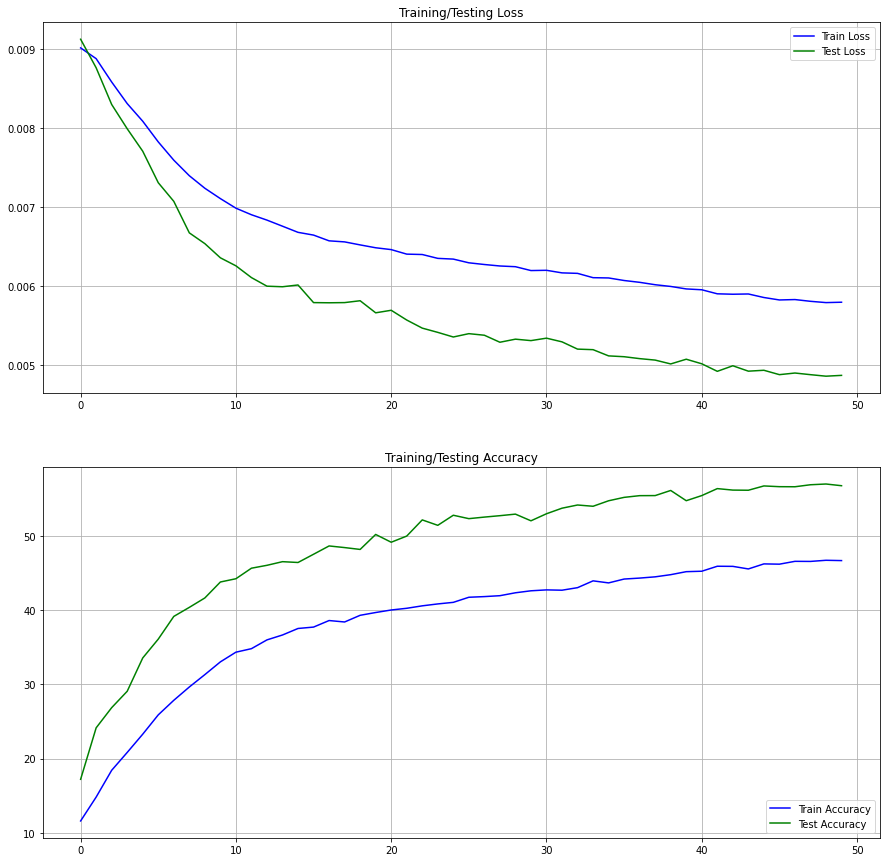

In [9]:
import matplotlib.pyplot as plt

train_losses = main.getTrainLoss()
test_losses = main.getTestLoss()
    
train_acc = main.getTrainAcc()
test_acc = main.getTestAcc()

   
fig, axs = plt.subplots(2,1,figsize=(15,15))
axs[0].plot(train_losses, color='b', label='Train Loss')
axs[0].plot(test_losses, color='g', label='Test Loss')
axs[0].grid()
axs[1].plot(train_acc, color='b', label='Train Accuracy')
axs[1].plot(test_acc, color='g', label='Test Accuracy')
axs[1].grid()
axs[0].legend(loc="upper right")
axs[1].legend(loc="lower right")
axs[0].set_title("Training/Testing Loss")
axs[1].set_title("Training/Testing Accuracy")

plt.savefig('plot.jpg', bbox_inches='tight')